In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB


In [39]:
# preparating of dataframe using the data at given link and defined columns list
labels = ["gender","age","openness","neuroticism","conscientiousness","agreeableness","extraversion","Personality"]
dataframe = pd.read_csv("psyc.csv", names=labels)


# separating out personality col and other cols
newDF, personality = dataframe.iloc[:, :-1], dataframe.iloc[:,-1]

# converting gender F/M to 0/1
le = LabelEncoder()
newDF["gender"] = le.fit_transform(newDF["gender"])

array = newDF.values

# separate array into input and output components
X = array[:,0:8]
Y = array[:,8:]
 
# initialising the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
# learning the statistical parameters for each of the data and transforming
rescaledX = scaler.fit_transform(X)
 
# summarize transformed data
np.set_printoptions(precision=3)
print(rescaledX[0:5,:])

dataframe.describe()

[[0.    0.652 0.857 1.    1.    0.571 0.571]
 [1.    0.522 0.571 0.375 0.5   0.143 0.429]
 [0.    0.87  0.571 0.5   0.75  0.143 0.429]
 [0.    0.565 0.714 0.125 0.75  0.429 0.857]
 [0.    0.609 0.143 0.375 0.75  0.    0.286]]


,age,openness,neuroticism,conscientiousness,agreeableness,extraversion
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,20.244444,4.850794,4.584127,4.812698,4.844444,4.926984
std,2.616811,1.537211,1.818623,1.786315,1.718555,1.466527
min,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,18.000000,4.000000,3.000000,4.000000,4.000000,4.000000
50%,20.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,22.000000,6.000000,6.000000,6.000000,6.000000,6.000000
max,28.000000,8.000000,9.000000,9.000000,8.000000,8.000000


[Text(0.5, 1.0, 'Personality changes a/c to age')]

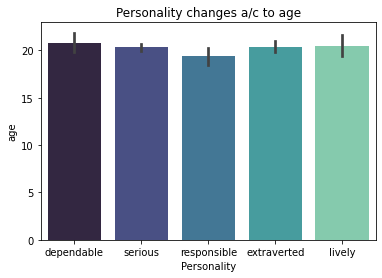

In [40]:
sns.barplot(y="age", x="Personality", data=dataframe, palette="mako").set(title='Personality changes a/c to age')

[Text(0.5, 1.0, 'Personality changes a/c to age and gender')]

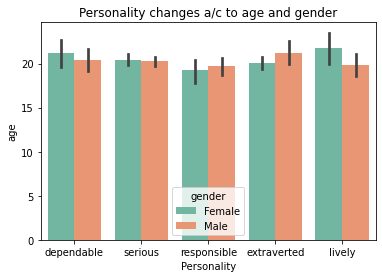

In [41]:
sns.barplot(y="age", x="Personality",hue="gender", data=dataframe, palette="Set2").set(title='Personality changes a/c to age and gender')

<AxesSubplot:>

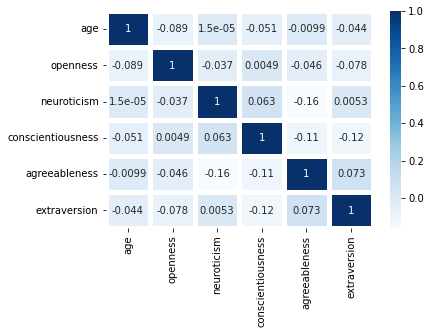

In [42]:
sns.heatmap(dataframe.corr(),annot=True, cmap="Blues", linewidths=5)

[Text(0.5, 1.0, 'Box Plot of Personality & age')]

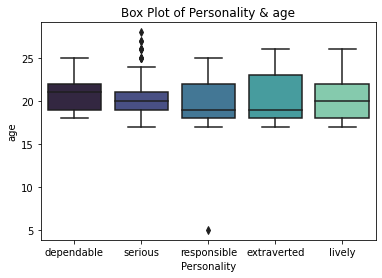

In [43]:
sns.boxplot(y="age", x="Personality", data=dataframe, palette="mako" ).set(title='Box Plot of Personality & age')

[Text(0.5, 1.0, 'Box Plot of Personality & openness')]

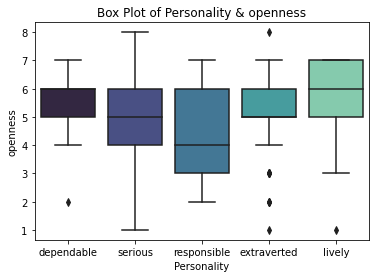

In [44]:
sns.boxplot(y="openness", x="Personality", data=dataframe, palette="mako" ).set(title='Box Plot of Personality & openness')

[Text(0.5, 1.0, 'Box Plot of Personality & neuroticism')]

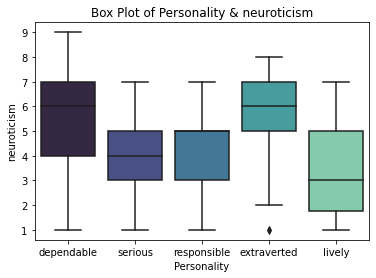

In [45]:
sns.boxplot(y="neuroticism", x="Personality", data=dataframe, palette="mako" ).set(title='Box Plot of Personality & neuroticism')

[Text(0.5, 1.0, 'Box Plot of Personality & conscientiousness')]

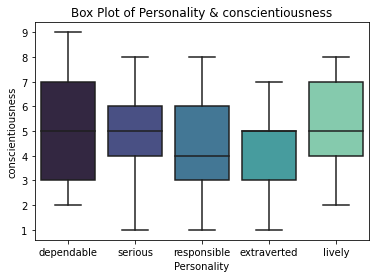

In [46]:
sns.boxplot(y="conscientiousness", x="Personality", data=dataframe, palette="mako" ).set(title='Box Plot of Personality & conscientiousness')

[Text(0.5, 1.0, 'Box Plot of Personality & agreeableness')]

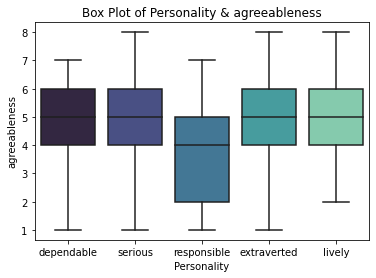

In [47]:
sns.boxplot(y="agreeableness", x="Personality", data=dataframe, palette="mako" ).set(title='Box Plot of Personality & agreeableness')

[Text(0.5, 1.0, 'Box Plot of Personality & extraversion')]

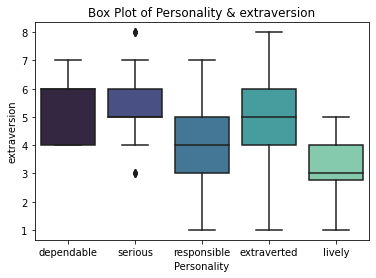

In [48]:
sns.boxplot(y="extraversion", x="Personality", data=dataframe, palette="mako" ).set(title='Box Plot of Personality & extraversion')

In [50]:
X_train, X_test, y_train, y_test = train_test_split(newDF, personality, test_size=0.30, random_state=42)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (220, 7)
X_test:  (95, 7)
y_train:  (220,)
y_test:  (95,)


In [52]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [53]:
print(accuracy_score(y_test, y_pred))

0.6105263157894737


In [34]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 0  4  0  0  7]
 [ 0 30  1  4  7]
 [ 0  1  4  0  4]
 [ 0  2  0  7 10]
 [ 0  5  1  0 71]]


In [35]:
(cm[0,0]+cm[1,1])/np.sum(cm)

0.189873417721519

In [36]:
print(classification_report(y_test, y_pred, zero_division=False))

              precision    recall  f1-score   support

  dependable       0.00      0.00      0.00        11
 extraverted       0.71      0.71      0.71        42
      lively       0.67      0.44      0.53         9
 responsible       0.64      0.37      0.47        19
     serious       0.72      0.92      0.81        77

    accuracy                           0.71       158
   macro avg       0.55      0.49      0.50       158
weighted avg       0.65      0.71      0.67       158

